# Life Expectancy and GDP

This is a portfolio project for codecademy, showing several learned tecniques and concepts, analizing the data from GDP and life expectancy for several countries and verifying if there is a correlation between these variables.

First, we'll import the needed modules:

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline

Now, we'll load the data with pandas and obtain basic information:

In [6]:
df = pd.read_csv('all_data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.7+ KB
None


In [7]:
print(df.head(10))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
5   Chile  2005                              78.4  1.229650e+11
6   Chile  2006                              78.9  1.547880e+11
7   Chile  2007                              78.9  1.736060e+11
8   Chile  2008                              79.6  1.796380e+11
9   Chile  2009                              79.3  1.723890e+11


In [8]:
countries = df.Country.unique()
print(countries)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [9]:
years = df.Year.unique()
print(years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


There are 6 countries listed and a range between 2000 and 2015 for the data. 

## Life expectancy Evolution

### Life Expectancy per country

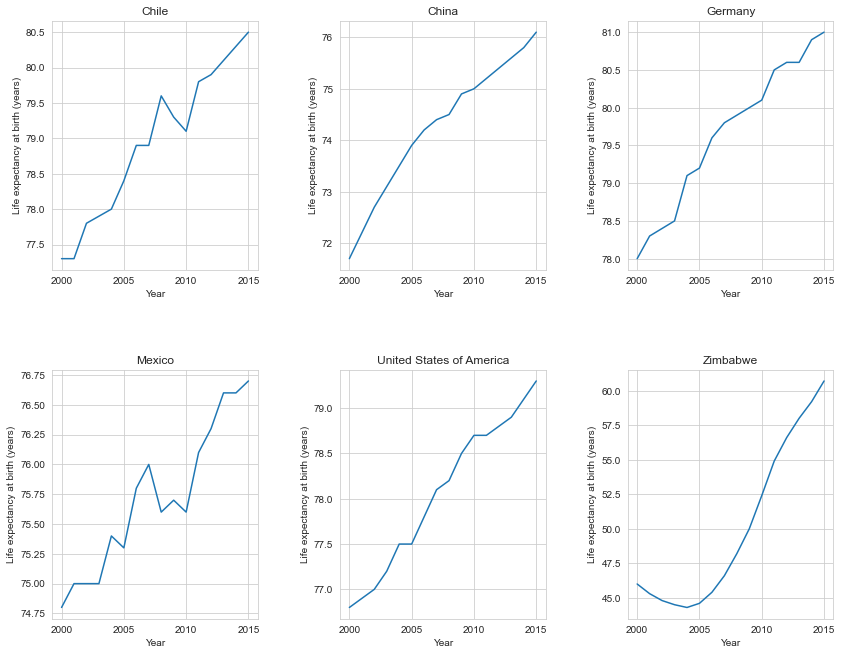

In [20]:
plt.figure( figsize=(14,11))
sns.set_style("whitegrid")
for idx, country in enumerate(countries):
    plt.subplot(2,3,idx+1)
    sns.lineplot(data=df[df.Country == country], x='Year', y='Life expectancy at birth (years)')
    plt.title(country)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

### Comparision of Life expectancy

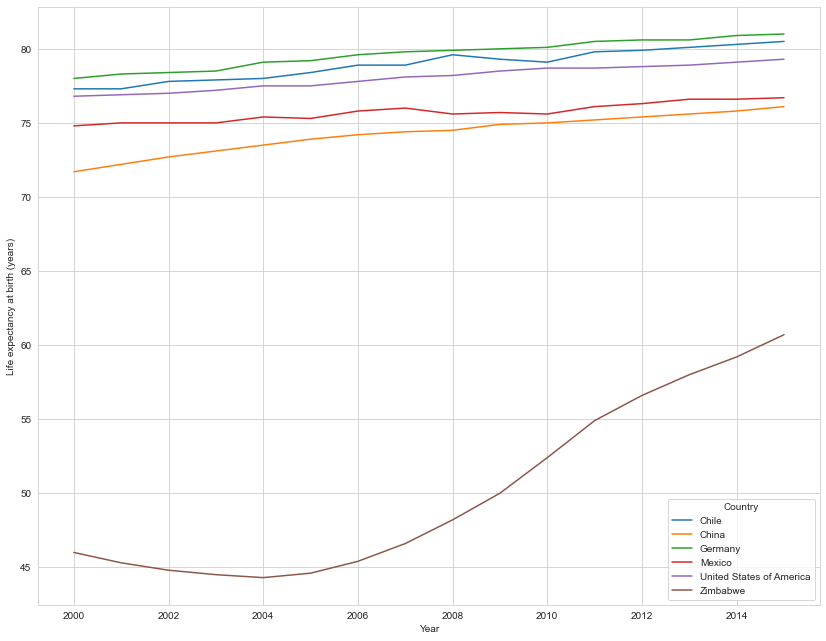

In [19]:
plt.figure(figsize=(14,11))
sns.set_style("whitegrid")
sns.lineplot(data=df, x='Year', y='Life expectancy at birth (years)', hue='Country')
plt.show()

As we can see, all the countries are have increased their citizens life expectancy in the 15 years of the sample, China having the more stable increase, the US and Germany also, but with periods of lower increase or stagnation in life expectancy. Mexico and Chile had drops in life expectancy between 2007 and 2011. Zimbabwe, having the lowest life expectancy started gowing around 2004.

## GDP evolution

### GDP per country

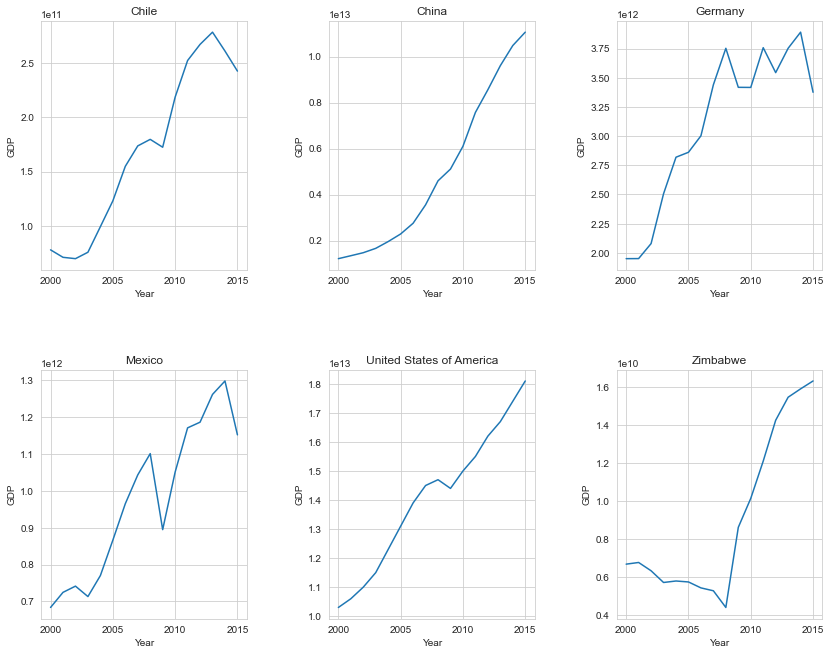

In [21]:
plt.figure( figsize=(14,11))
sns.set_style("whitegrid")
for idx, country in enumerate(countries):
    plt.subplot(2,3,idx+1)
    sns.lineplot(data=df[df.Country == country], x='Year', y='GDP')
    plt.title(country)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

### GDP comparision

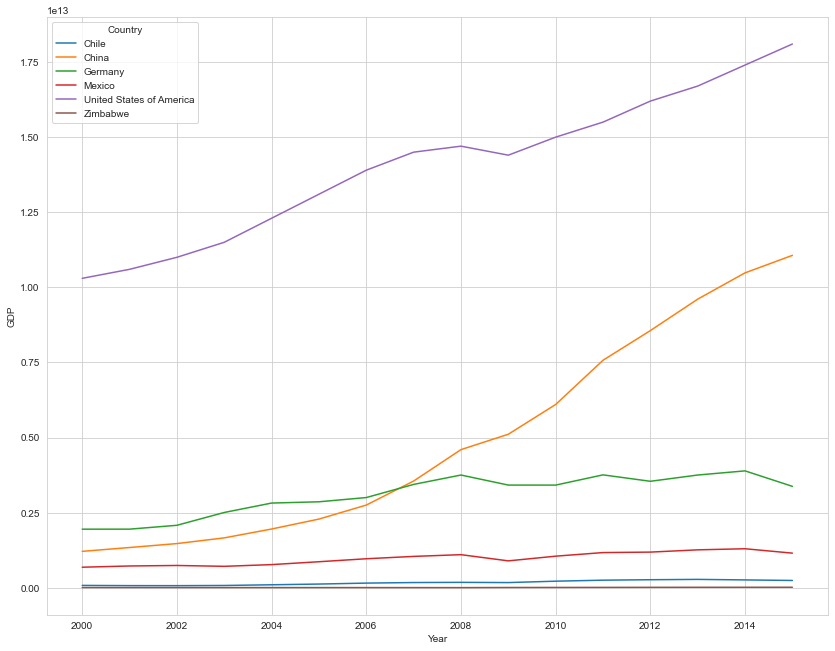

In [22]:
plt.figure(figsize=(14,11))
sns.set_style("whitegrid")
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.show()

### Calculating the correlation between the GDP and life expectancy at birth

To do this we'll use the Pearson correlation coefficient using scipy:

In [18]:
print('Correlation coefficients:')
for country in countries:
    country_data = df[df.Country == country]
    r, pval = pearsonr(country_data['Life expectancy at birth (years)'], country_data['GDP'])
    print(country+':', r)

Correlation coefficients:
Chile: 0.9498766659254416
China: 0.9085255408648357
Germany: 0.932698898256127
Mexico: 0.9322377167847082
United States of America: 0.9817092382430257
Zimbabwe: 0.9661998955858778


There is a **strong** positive correlation between these variables as shown by the positive near 1 coefficient

## Conclusions

The Life expectancy is greatly influenced by the GDP as  there is a strong correlation between these variables, that can be seen in the charts, as it is reinforced by the Pearson coefficient. To note that developed countries like the US and Germany resist better to GDP drops affecting their life expectancy due to the existing infrastructure and social systems. Countries in development do verify drops in life expectancy when GDP drops. To note the great increase in life expectancy in Zimbabwe and the enourmous economic growth of China.